In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
test_data = pd.DataFrame()

test_data['test'] = [90, 100, 85, 93, 88, 100, 97, 92, 89, 84,
                     55, 65, 75, 58, 69, 71, 72, 63, 70, 59]
test_data['project'] = [100, 85, 98, 88, 87, 99, 99, 86, 89, 100,
                        67, 71, 74, 73, 55, 59, 56, 72, 67, 72]
test_data['pass'] = ['pass', 'pass', 'pass', 'pass', 'pass',
                     'pass', 'pass', 'pass', 'pass', 'pass',
                     'fail', 'fail', 'fail', 'fail', 'fail',
                     'fail', 'fail', 'fail', 'fail', 'fail']

In [3]:
# Import Perceptron.
from sklearn.linear_model import Perceptron

# Establish X and Y.
X = test_data[['test', 'project']]
Y = test_data['pass']

# Establish Perceptron Model.
# 10,000 iterations to ensure accuracy since data is non-normalized.
perceptron = Perceptron(n_iter=10000)

# Fit Perceptron.
perceptron.fit(X, Y)

# Get Parameters.
print('Score: ' + str(perceptron.score(X, Y)))

Score: 1.0


C:\Users\fergu\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:73: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


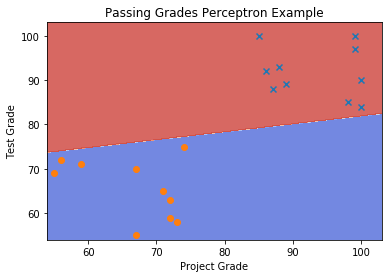

In [4]:
# Establish a mesh for our plot.
x_min, x_max = X.test.min() - 1, X.test.max() + 3
y_min, y_max = X.project.min() - 1, X.project.max() + 3
xx, yy = np.meshgrid(np.arange(x_min, x_max, .1),
                     np.arange(y_min, y_max, .1))

# Predict over that mesh.
Z = (perceptron.predict(np.c_[xx.ravel(), yy.ravel()])=='pass')


# Reshape the prediction to be plottable.
Z = Z.reshape(xx.shape)

# Plot the mesh.
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot our two scatters.
plt.scatter(test_data.project[0:10], test_data.test[0:10], marker='x')
plt.scatter(test_data.project[10:20], test_data.test[10:20], marker='o')

# Aesthetics.
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel('Project Grade')
plt.ylabel('Test Grade')
plt.title('Passing Grades Perceptron Example')
plt.show()

# Supervised Neural Nets

In [5]:
artworks = pd.read_csv('https://media.githubusercontent.com/media/MuseumofModernArt/collection/master/Artworks.csv')

In [6]:
artworks.columns

Index(['Title', 'Artist', 'ConstituentID', 'ArtistBio', 'Nationality',
       'BeginDate', 'EndDate', 'Gender', 'Date', 'Medium', 'Dimensions',
       'CreditLine', 'AccessionNumber', 'Classification', 'Department',
       'DateAcquired', 'Cataloged', 'ObjectID', 'URL', 'ThumbnailURL',
       'Circumference (cm)', 'Depth (cm)', 'Diameter (cm)', 'Height (cm)',
       'Length (cm)', 'Weight (kg)', 'Width (cm)', 'Seat Height (cm)',
       'Duration (sec.)'],
      dtype='object')

In [7]:
# Select Columns.
artworks = artworks[['Artist', 'Nationality', 'Gender', 'Date', 'Department',
                    'DateAcquired', 'URL', 'ThumbnailURL', 'Height (cm)', 'Width (cm)']]

In [8]:
artworks.head()

,Artist,Nationality,Gender,Date,Department,DateAcquired,URL,ThumbnailURL,Height (cm),Width (cm)
0,Otto Wagner,(Austrian),(Male),1896,Architecture & Design,1996-04-09,http://www.moma.org/collection/works/2,http://www.moma.org/media/W1siZiIsIjU5NDA1Il0s...,48.6000,168.9000
1,Christian de Portzamparc,(French),(Male),1987,Architecture & Design,1995-01-17,http://www.moma.org/collection/works/3,http://www.moma.org/media/W1siZiIsIjk3Il0sWyJw...,40.6401,29.8451
2,Emil Hoppe,(Austrian),(Male),1903,Architecture & Design,1997-01-15,http://www.moma.org/collection/works/4,http://www.moma.org/media/W1siZiIsIjk4Il0sWyJw...,34.3000,31.8000
3,Bernard Tschumi,(),(Male),1980,Architecture & Design,1995-01-17,http://www.moma.org/collection/works/5,http://www.moma.org/media/W1siZiIsIjEyNCJdLFsi...,50.8000,50.8000
4,Emil Hoppe,(Austrian),(Male),1903,Architecture & Design,1997-01-15,http://www.moma.org/collection/works/6,http://www.moma.org/media/W1siZiIsIjEyNiJdLFsi...,38.4000,19.1000


In [9]:
# Convert URL's to booleans.
artworks['URL'] = artworks['URL'].notnull()
artworks['ThumbnailURL'] = artworks['ThumbnailURL'].notnull()

In [10]:
artworks.head()

,Artist,Nationality,Gender,Date,Department,DateAcquired,URL,ThumbnailURL,Height (cm),Width (cm)
0,Otto Wagner,(Austrian),(Male),1896,Architecture & Design,1996-04-09,True,True,48.6000,168.9000
1,Christian de Portzamparc,(French),(Male),1987,Architecture & Design,1995-01-17,True,True,40.6401,29.8451
2,Emil Hoppe,(Austrian),(Male),1903,Architecture & Design,1997-01-15,True,True,34.3000,31.8000
3,Bernard Tschumi,(),(Male),1980,Architecture & Design,1995-01-17,True,True,50.8000,50.8000
4,Emil Hoppe,(Austrian),(Male),1903,Architecture & Design,1997-01-15,True,True,38.4000,19.1000


In [11]:
# Drop films and some other tricky rows.
artworks = artworks[artworks['Department']!='Film']
artworks = artworks[artworks['Department']!='Media and Performance Art']
artworks = artworks[artworks['Department']!='Fluxus Collection']

In [12]:
# Drop missing data.
artworks = artworks.dropna()

In [13]:
artworks.head()

,Artist,Nationality,Gender,Date,Department,DateAcquired,URL,ThumbnailURL,Height (cm),Width (cm)
0,Otto Wagner,(Austrian),(Male),1896,Architecture & Design,1996-04-09,True,True,48.6000,168.9000
1,Christian de Portzamparc,(French),(Male),1987,Architecture & Design,1995-01-17,True,True,40.6401,29.8451
2,Emil Hoppe,(Austrian),(Male),1903,Architecture & Design,1997-01-15,True,True,34.3000,31.8000
3,Bernard Tschumi,(),(Male),1980,Architecture & Design,1995-01-17,True,True,50.8000,50.8000
4,Emil Hoppe,(Austrian),(Male),1903,Architecture & Design,1997-01-15,True,True,38.4000,19.1000


In [14]:
artworks.dtypes

Artist           object
Nationality      object
Gender           object
Date             object
Department       object
DateAcquired     object
URL                bool
ThumbnailURL       bool
Height (cm)     float64
Width (cm)      float64
dtype: object

In [15]:
artworks['DateAcquired'] = pd.to_datetime(artworks.DateAcquired)
artworks['YearAcquired'] = artworks.DateAcquired.dt.year
artworks['YearAcquired'].dtype

dtype('int64')

In [16]:
artworks.shape

(105745, 11)

In [18]:
# Remove multiple nationalities, genders, and artists.
artworks.loc[artworks['Gender'].str.contains('\) \('), 'Gender'] = '\(multiple_persons\)'
artworks.loc[artworks['Nationality'].str.contains('\) \('), 'Nationality'] = '\(multiple_nationalities\)'
artworks.loc[artworks['Artist'].str.contains(','), 'Artist'] = 'Multiple_Artists'

# Convert dates to start date, cutting down number of distinct examples.
artworks['Date'] = pd.Series(artworks.Date.str.extract(
    '([0-9]{4})', expand=False))[:-1]

# Final column drops and NA drop.
X = artworks.drop(['Department', 'DateAcquired', 'Artist', 'Nationality', 'Date'], 1)

# Create dummies separately.
artists = pd.get_dummies(artworks.Artist)
nationalities = pd.get_dummies(artworks.Nationality)
dates = pd.get_dummies(artworks.Date)

# Concat with other variables, but artists slows this wayyyyy down so we'll keep it out for now
X = pd.get_dummies(X, sparse=True)
X = pd.concat([X, nationalities, dates], axis=1)

Y = artworks.Department

In [19]:
pd.DataFrame(artworks['Gender'].unique())

,0
0,(Male)
1,\(multiple_persons\)
2,(Female)
3,()
4,(male)


In [20]:
# Alright! We've done our prep, let's build the model.
# Neural networks are hugely computationally intensive.
# This may take several minutes to run.

# Import the model.
from sklearn.neural_network import MLPClassifier

# Establish and fit the model, with a single, 1000 perceptron layer.
mlp = MLPClassifier(hidden_layer_sizes=(1000,))
mlp.fit(X, Y)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(1000,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [21]:
# Get data types.
artworks.dtypes

Artist                  object
Nationality             object
Gender                  object
Date                    object
Department              object
DateAcquired    datetime64[ns]
URL                       bool
ThumbnailURL              bool
Height (cm)            float64
Width (cm)             float64
YearAcquired             int64
dtype: object

In [22]:
artworks['DateAcquired'] = pd.to_datetime(artworks.DateAcquired)
artworks['YearAcquired'] = artworks.DateAcquired.dt.year
artworks['YearAcquired'].dtype

dtype('int64')

In [23]:
# Remove multiple nationalities, genders, and artists.
artworks.loc[artworks['Gender'].str.contains('\) \('), 'Gender'] = '\(multiple_persons\)'
artworks.loc[artworks['Nationality'].str.contains('\) \('), 'Nationality'] = '\(multiple_nationalities\)'
artworks.loc[artworks['Artist'].str.contains(','), 'Artist'] = 'Multiple_Artists'

# Convert dates to start date, cutting down number of distinct examples.
artworks['Date'] = pd.Series(artworks.Date.str.extract(
    '([0-9]{4})', expand=False))[:-1]

# Final column drops and NA drop.
X = artworks.drop(['Department', 'DateAcquired', 'Artist', 'Nationality', 'Date'], 1)

# Create dummies separately.
artists = pd.get_dummies(artworks.Artist)
nationalities = pd.get_dummies(artworks.Nationality)
dates = pd.get_dummies(artworks.Date)

# Concat with other variables, but artists slows this wayyyyy down so we'll keep it out for now
X = pd.get_dummies(X, sparse=True)
X = pd.concat([X, nationalities, dates], axis=1)

Y = artworks.Department

In [24]:
# Alright! We've done our prep, let's build the model.
# Neural networks are hugely computationally intensive.
# This may take several minutes to run.

# Import the model.
from sklearn.neural_network import MLPClassifier

# Establish and fit the model, with a single, 1000 perceptron layer.
mlp = MLPClassifier(hidden_layer_sizes=(1000,))
mlp.fit(X, Y)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(1000,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [25]:
mlp.score(X, Y)

0.70054376093432313

In [26]:
Y.value_counts()/len(Y)

Prints & Illustrated Books    0.521396
Photography                   0.227869
Architecture & Design         0.113225
Drawings                      0.103731
Painting & Sculpture          0.033779
Name: Department, dtype: float64

In [27]:
from sklearn.model_selection import cross_val_score
cross_val_score(mlp, X, Y, cv=5)

array([ 0.56437048,  0.67167849,  0.46441912,  0.55579724,  0.45264104])

In [33]:
import time
start_time = time.time()
fraction = 0.1
Xsamp = X.sample(frac=fraction)
Ysamp = Y.sample(frac=fraction)

mlp = MLPClassifier(hidden_layer_sizes=(1000,))
mlp.fit(Xsamp, Ysamp)
print(cross_val_score(mlp, Xsamp, Ysamp, cv=5))

time_interval = '%.1f' % ((time.time() - start_time) / 60)
print('Time taken: {} minutes'.format(time_interval))

[ 0.11525744  0.51559546  0.11347518  0.51608325  0.23248106]
Time taken: 2.3 minutes


### Increasing the number of invisible layers reduces the tendency to overfit:

In [32]:
start_time = time.time()
fraction = 0.1
Xsamp = X.sample(frac=fraction)
Ysamp = Y.sample(frac=fraction)

mlp = MLPClassifier(hidden_layer_sizes=(500,500))
mlp.fit(Xsamp, Ysamp)
print(cross_val_score(mlp, Xsamp, Ysamp, cv=5))

time_interval = '%.1f' % ((time.time() - start_time) / 60)
print('Time taken: {} minutes'.format(time_interval))

[ 0.52504726  0.21938534  0.52718676  0.11300236  0.50638902]
Time taken: 3.9 minutes


In [34]:
start_time = time.time()
fraction = 0.1
Xsamp = X.sample(frac=fraction)
Ysamp = Y.sample(frac=fraction)

mlp = MLPClassifier(hidden_layer_sizes=(333,333,333))
mlp.fit(Xsamp, Ysamp)
print(cross_val_score(mlp, Xsamp, Ysamp, cv=5))

time_interval = '%.1f' % ((time.time() - start_time) / 60)
print('Time taken: {} minutes'.format(time_interval))

[ 0.51346245  0.51347518  0.51347518  0.51182592  0.50118315]
Time taken: 3.6 minutes


In [35]:
start_time = time.time()
fraction = 0.1
Xsamp = X.sample(frac=fraction)
Ysamp = Y.sample(frac=fraction)

mlp = MLPClassifier(hidden_layer_sizes=(250,250,250,250))
mlp.fit(Xsamp, Ysamp)
print(cross_val_score(mlp, Xsamp, Ysamp, cv=5))

time_interval = '%.1f' % ((time.time() - start_time) / 60)
print('Time taken: {} minutes'.format(time_interval))

[ 0.52149268  0.52268431  0.52245863  0.52247989  0.52247989]
Time taken: 1.0 minutes


### The sigmoid function seems to give better and more consistent results, less prone to overfitting

In [36]:
start_time = time.time()
fraction = 0.1
Xsamp = X.sample(frac=fraction)
Ysamp = Y.sample(frac=fraction)

mlp = MLPClassifier(hidden_layer_sizes=(1000,), activation='logistic')
mlp.fit(Xsamp, Ysamp)
print(cross_val_score(mlp, Xsamp, Ysamp, cv=5))

time_interval = '%.1f' % ((time.time() - start_time) / 60)
print('Time taken: {} minutes'.format(time_interval))

[ 0.52457467  0.52457467  0.5248227   0.52459792  0.52484619]
Time taken: 1.1 minutes


In [37]:
start_time = time.time()
fraction = 0.1
Xsamp = X.sample(frac=fraction)
Ysamp = Y.sample(frac=fraction)

mlp = MLPClassifier(hidden_layer_sizes=(500,500), activation='logistic')
mlp.fit(Xsamp, Ysamp)
print(cross_val_score(mlp, Xsamp, Ysamp, cv=5))

time_interval = '%.1f' % ((time.time() - start_time) / 60)
print('Time taken: {} minutes'.format(time_interval))

[ 0.52385451  0.52434988  0.52434988  0.52459792  0.52437293]
Time taken: 2.3 minutes


In [38]:
start_time = time.time()

mlp = MLPClassifier(hidden_layer_sizes=(333,333,333), activation='logistic')
mlp.fit(Xsamp, Ysamp)
print(cross_val_score(mlp, Xsamp, Ysamp, cv=5))

time_interval = '%.1f' % ((time.time() - start_time) / 60)
print('Time taken: {} minutes'.format(time_interval))

[ 0.52385451  0.52434988  0.52434988  0.52459792  0.52437293]
Time taken: 1.0 minutes


In [39]:
start_time = time.time()

mlp = MLPClassifier(hidden_layer_sizes=(250,250,250,250), activation='logistic')
mlp.fit(Xsamp, Ysamp)
print(cross_val_score(mlp, Xsamp, Ysamp, cv=5))

time_interval = '%.1f' % ((time.time() - start_time) / 60)
print('Time taken: {} minutes'.format(time_interval))

[ 0.52385451  0.52434988  0.52434988  0.52459792  0.52437293]
Time taken: 0.5 minutes


### Increase alpha to 0.1 (from default 0.0001)
This seems to give slightly worse results with one perceptron layer, and worse results as the number of layers is progressively increased to 4. This is comparing wih the original case: one layer, activation='relu', alpha=0.0001 

In [42]:
start_time = time.time()

mlp = MLPClassifier(hidden_layer_sizes=(1000,), alpha=0.1)
mlp.fit(Xsamp, Ysamp)
print(cross_val_score(mlp, Xsamp, Ysamp, cv=5))

time_interval = '%.1f' % ((time.time() - start_time) / 60)
print('Time taken: {} minutes'.format(time_interval))

[ 0.10581011  0.22364066  0.05862884  0.10501419  0.52437293]
Time taken: 1.0 minutes


In [43]:
start_time = time.time()

mlp = MLPClassifier(hidden_layer_sizes=(500,500), alpha=0.1)
mlp.fit(Xsamp, Ysamp)
print(cross_val_score(mlp, Xsamp, Ysamp, cv=5))

time_interval = '%.1f' % ((time.time() - start_time) / 60)
print('Time taken: {} minutes'.format(time_interval))

[ 0.52385451  0.52434988  0.20330969  0.52412488  0.10743019]
Time taken: 3.2 minutes


In [44]:
start_time = time.time()

mlp = MLPClassifier(hidden_layer_sizes=(333,333,333), alpha=0.1)
mlp.fit(Xsamp, Ysamp)
print(cross_val_score(mlp, Xsamp, Ysamp, cv=5))

time_interval = '%.1f' % ((time.time() - start_time) / 60)
print('Time taken: {} minutes'.format(time_interval))

[ 0.52385451  0.52434988  0.52245863  0.52365184  0.10553715]
Time taken: 0.9 minutes


In [45]:
start_time = time.time()

mlp = MLPClassifier(hidden_layer_sizes=(250,250,250,250), alpha=0.1)
mlp.fit(Xsamp, Ysamp)
print(cross_val_score(mlp, Xsamp, Ysamp, cv=5))

time_interval = '%.1f' % ((time.time() - start_time) / 60)
print('Time taken: {} minutes'.format(time_interval))

[ 0.45441663  0.5248227   0.52340426  0.52412488  0.22479886]
Time taken: 1.0 minutes


In [46]:
# Reducing alpha instead of increasing it does not seem to help accuracy:
start_time = time.time()

mlp = MLPClassifier(hidden_layer_sizes=(1000,), alpha=0.0000001)
mlp.fit(Xsamp, Ysamp)
print(cross_val_score(mlp, Xsamp, Ysamp, cv=5))

time_interval = '%.1f' % ((time.time() - start_time) / 60)
print('Time taken: {} minutes'.format(time_interval))

[ 0.52243741  0.20047281  0.22789598  0.52459792  0.2243256 ]
Time taken: 1.5 minutes
